# Abstract

# Introduction


# Data

## Mushrooms
The mushroom dataset contains descriptive data for (hypothetical) samples of 23 species of gilled mushrooms in the Agaricus and Lepiota Family. The samples are drawn from *The Audubon Society Field Guide to North American Mushrooms* (1981). Each species is classified as either edible (class e) or poisonus (class p), where the poisonus category includes both species known to be poisonus as well as species that are either known to be poisonous or where edibility is unknown.

The data set contains a total of 8124 samples, each described with 22 descriptors. To reduce the size of the dataset, each attribute value is coded to a letter. These attributes are as follows:
1. cap-shape:
    * bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. cap-surface:
    * fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color:
    * brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?:
    * bruises=t,no=f
5. odor:
    * almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
6. gill-attachment:
    * attached=a,descending=d,free=f,notched=n
7. gill-spacing:
    * close=c,crowded=w,distant=d
8. gill-size:
    * broad=b,narrow=n
9. gill-color:
    * black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape:
    * enlarging=e,tapering=t
11. stalk-root:
    * bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring:
    * fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring:
    * fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring:
    * brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring:
    * brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type:
    * partial=p,universal=u
17. veil-color:
    * brown=n,orange=o,white=w,yellow=y
18. ring-number:
    * none=n,one=o,two=t
19. ring-type:
    * cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color:
    * black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population:
    * abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat:
    * grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
  

### Known Simple Rules
As this data set has been studied extensively, several more or less comples rules have bben found for deciding whether a given mushroom is edible or not. Particularly a set of four markedly simple rules have been found that together give a 100 % accuracy on classifying poisonous mushrooms []:

* $\texttt{P_1}$: odor=NOT(almond.OR.anise.OR.none)
	     120 poisonous cases missed, 98.52% accuracy
* $\texttt{P_2}$: spore-print-color=green
	     48 cases missed, 99.41% accuracy
         
* $\texttt{P_3}$: odor=none.AND.stalk-surface-below-ring=scaly.AND.(stalk-color-above-ring=NOT.brown) 
	     8 cases missed, 99.90% accuracy
         
* $\texttt{P_4}$: habitat=leaves.AND.cap-color=white
	     0 cases missed, 100% accuracy 

# Methods

## Decision Trees
A decision tree is a type of supervised learning model that can be used for both regression and classification problems. They are named *trees* as their structure consists of a root node recursively split into nodes willowing "branches", ending in the en-nodes also known as "leaves". Each split is based on a decision for one of the features of the data. When using a decision tree for prediction we move down the tree with our input data, for each node determining if the relevant feature is below or above some threshold, or if it is true/false or some other binary divider. When we reach the end of the tree, one of the leaf nodes, this node tells us the resulting prediction.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

Decision trees are popular models for real life problems as they preduce easily interpretable models that resemble human decision making. They do not require normalization of the inputs, and they can be used to model non-linear relationships.

They are, however, prone to overfitting and generally do not provide the best predictive accuracy. Other challenges for decision trees are that small changes in the data may lead to a completely different tree structure, and unbalanced datasets with a target feature value that occur much more frequently than others may lead to biased trees since the frequently occurring feature values are preferred over the less frequently occurring ones. In addition features with many levels may be preferred over features with fewer levels as it is then easier to split the dataset such that the splits only contain pure target feature values. 

Many of these issues can be improved upon by using ensemble methods, methods that aggregate several decision trees. This generally comes at the cost of intepretability.

Available algorithms for building a decision tree include ID3, C4.5 and CART. These algoriths typically use different criteria for how to perform splitting, ID3 uses information gain, C4.5 uses gain ratio, while CART uses the gini index.
### CART Algorithm
Originally the term Classification And Regression Tree (CART) was introduced by Breiman et al.[] as an umbrella term used for analysis of regression as well as classification trees. The CART algorithm is the most commonly used algorith for building decision trees. It is a non-parametric learning technique for building trees. 

Using the CART algorithm trees are constructed using a top-down approach. We start by looking at all the available training data, and selecting the split that minimizes the cost function. This is then the root node. Split is performed in the same way moving down the tree until a stopping criteria is met.

To decide on the best split, a measure of impurity, $G$, is used. For CART this is typically the Gini index, while other options include the information entropy, or the misclassification rate, see the following sections. 

We split the dataset into two subsets $a$ and $b$ using a single feature $k$ and a threshold $t_k$, by finding the pair $(k,t_k)$ giving the lowest impurity for the subsets according to the chosen impurity measure. 
This minimizes our cost function for this problem,

$$
C(k,t_k) = \frac{m_{\mathrm{a}}}{m}G_{\mathrm{a}}+ \frac{m_{\mathrm{b}}}{m}G_{\mathrm{b}},
$$

where $G_{\mathrm{a/b}}$ measures the impurity of each of the subsets, and $m_{\mathrm{a/b}}$ is the number of instances in subset $a$ and subset $b$, respectively.

There are several possible stopping criteria, like maximum depth of tree, all members of the node belonging to the same class, the impurity factor decreasing by less than some threshold for further splits, or that the minimum number of node members is reached.

#### Building the Tree
When building the tree we start with the root node and move recursively down the tree as indicated in the following pseudocode: []

    def find_split(input_data, target):
        start_impurity = find_impurity(data, target)
        split_threshold, split_feature, split_impurity
        for each feature in input_data:
            for each unique_value in feature:
                threshold = value
                impurity = find_impurity(feature, threshold)
                if impurity is better than split_impurity:
                    split_threshold = threshold
                    split_impurity = impurity
                    split_feature = feature
        split_node(split_feature, split_threshold, input_data, target)

### Gini Index
The Gini index is also called the Gini impurity, and it measures the probability of a particular variable that is randomly chosen being wrongly classified. As such it takes values between 0 and 1. Another way to look at it is that it measures the lack of 'purity' of the variables. A node is pure if all its variables or members belong to one class.The gini index then takes the value 0. The more of the members of the node that belong to a different class, the more impure the node is. 

Denoting the fraction of observations (or members) of node/region $m$ being classified to a particular class $k$ as $p_{mk}$, the Gini index, $g$ can be defined as

$$
g = \sum_{k=1}^K p_{mk}(1-p_{mk}) = 1-\sum_{k=1}^K p_{mk}^2.
$$

The fraction $p_{mk}$ can be calculated as

$$
p_{mk} = \frac{1}{N_m}\sum_{x_i\in R_m}I(y_i=k).
$$

When building a decision tree using CART with the Gini index as impurity measure we choose the attribute/feature with the smalles Gini index as the root node.

### Entropy
Entropy is another measure for impurity. It is known from thermodynamics as a measure of disorder. In the classification case the entropy, or information entropy, is a measure for how much information we gain by knowing the value (or classification) of more features. 

The entropy, $s$, can be defined in terms of the fraction $p_{mk}$ defined in the section above, as

$$
s = -\sum_{k=1}^K p_{mk}\log{p_{mk}}.
$$

## Ensemble Methods

### Boosting

### Random Forests

## Data Processing
### Principal Component Analysis

Principal Component Analysis (PCA) is a popular technique for reducing the dimensionality of a high dimensional problem. The idea is to project information from a high-dimensional space into a lower-dimensional sub-space, while preserving the essential parts of the data, meaning those with more variation, while removing the non-essential parts with less variation. The preserved parts are the *principal components.

### Feature Selection

#### Variance Threshold
Remove all features where the variance is below a threshold. If a feature has a low variance, it is less useful for separating entries belonging to different classes.

#### Univariate Feature Selection [number][number]
Selects the best features according to some scoring function. We have used the $\chi^2$ test statistic, which measures the dependence between stochastic variables, and can be used for categorical fariabler or features, which is what we have.The features that are the most likely to be independent of class and therefore irrelevant for classification are scored low, and can be removed.

The $\chi^2$ test statistic is a statistical hypothesis test. With the assumption that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable, the test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi (X) pronounced “ki” as in kite.

Given the Sex/Interest example above, the number of observations for a category (such as male and female) may or may not the same. Nevertheless, we can calculate the expected frequency of observations in each Interest group and see whether the partitioning of interests by Sex results in similar or different frequencies.

The Chi-Squared test does this for a contingency table, first calculating the expected frequencies for the groups, then determining whether the division of the groups, called the observed frequencies, matches the expected frequencies.

The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same.

## Performance Measures

### Accuracy

### ROC Curve

# Results and Discussion

## Pre-processing the Data

In [88]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../Code')
sys.path.append('../Data')
import DecisionTree as dt

df = pd.read_csv('../Data/UCI MLR/agaricus-lepiota.data.csv', 
                 names=['class','cap-shape','cap-surface','cap-color',
                 'bruises','odor','gill-attachment','gill-spacing',
                 'gill-size','gill-color','stalk-shape','stalk-root',
                 'stalk-surface-above-ring','stalk-surface-below-ring',
                 'stalk-color-above-ring','stalk-color-below-ring',
                 'veil-type','veil-color','ring-number','ring-type',
                 'spore-print-color','population','habitat'])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


As we know, all the features of this dataset are categorical. We can first explore the data by looking at the unique values for each feature, see table number.

In [89]:
print("Table 1: Unique values of the features in the mushroom data set.")
pd.concat({'unique values': df.apply(pd.unique), '# unique values': df.nunique()}, axis=1)

Table 1: Unique values of the features in the mushroom data set.


,unique values,# unique values
class,"[p, e]",2
cap-shape,"[x, b, s, f, k, c]",6
cap-surface,"[s, y, f, g]",4
cap-color,"[n, y, w, g, e, p, b, u, c, r]",10
bruises,"[t, f]",2
odor,"[p, a, l, n, f, c, y, s, m]",9
gill-attachment,"[f, a]",2
gill-spacing,"[c, w]",2
gill-size,"[n, b]",2
gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]",12


As we can see, there is only one used value for veil-type, 'p' or partial. This feature then provides us with no information that we can use to distinguish the different mushrooms, and we remove the feature completely. We also check to make sure none of the entries are missing values. 

In [90]:
df.drop(columns=['veil-type'], axis=1, inplace=True)
print("Table 2: The number of missing values for each features. We see that no values are missing.")
df.isnull().sum()

Table 2: The number of missing values for each features. We see that no values are missing.


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Another point of interest is whether the data are fairly evenly divided amongst the two categories. The check this by comparing the number of entries belonging to each class.

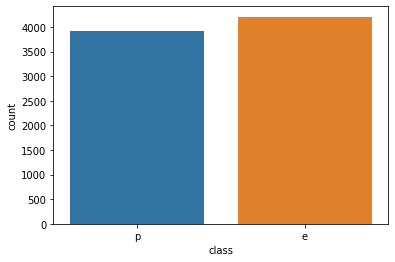

Figure 2: Histogram of class distribution. We can see the dataset contains a fairly even split between the two
classes.


In [91]:
# Creating histogram 
import seaborn as sns
s = sns.countplot(x = "class", data = df)
# Show plot 
plt.show() 
print("Figure 2: Histogram of class distribution. We can see the dataset contains a fairly even split between the two\
\nclasses.")

Figure number shows a heatmat of the correlations between the features.

In [92]:
# Now we have a look at the correlation matrix
df_numerical = df
# First we need to map to number-values
from sklearn.preprocessing import LabelEncoder
les = {col: LabelEncoder() for col in df_numerical.columns}
for col in les:
    df_numerical[col] = les[col].fit_transform(df_numerical[col])

df_numerical.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Figure number: A heatmap showing the correlation matrix for the features in the mushroom dataset.


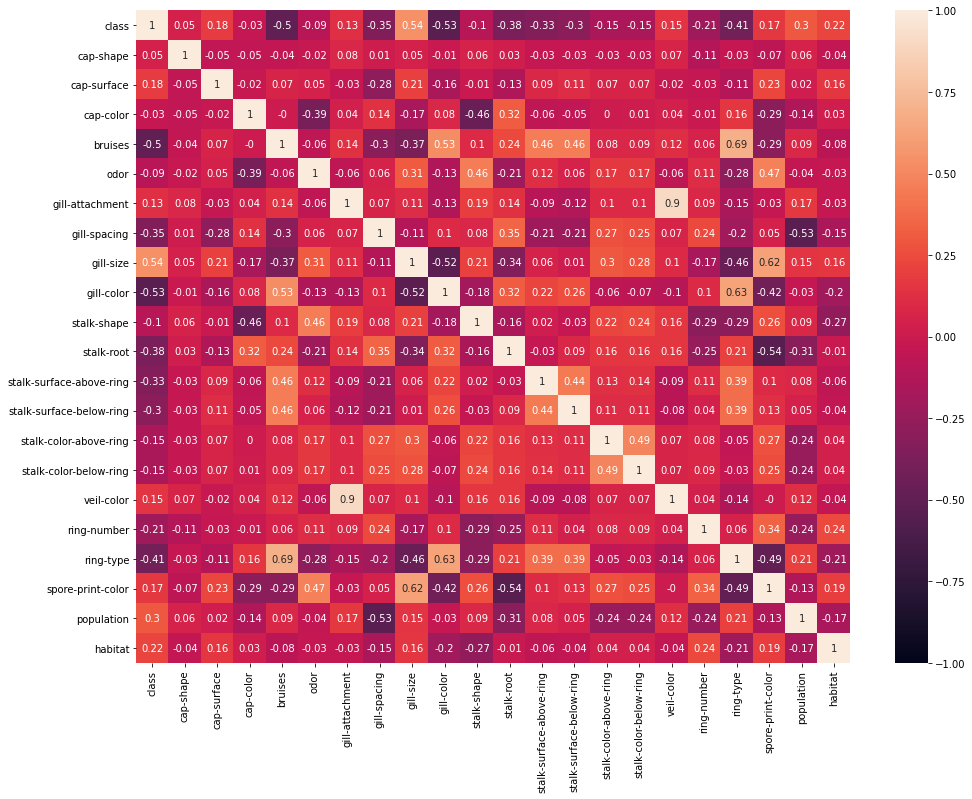

In [93]:
correlation_matrix = df_numerical.corr().round(2)
fig, ax = plt.subplots(figsize =(16, 12)) 
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1, vmax=1)
print("Figure number: A heatmap showing the correlation matrix for the features in the mushroom dataset.")

We see that $\texttt{class}$ is most highly correlated with $\texttt{gill-size}$, $\texttt{gill-color}$, and $\texttt{bruises}$, followed by $\texttt{ring-type}$, $\texttt{stalk-root}$, and $\texttt{gill-spacing}$. The most highly corrolated features (meaning they provide much of the same information) are $\texttt{gill-attachment}$ and $\texttt{ring-number}$, with a correlation of 0.9. Other fairly correlated features are $\texttt{bruises}$ and $\texttt{ring-type}$, $\texttt{gill-color}$ and $\texttt{ring-type}$, and $\texttt{gill-size}$ and $\texttt{spore-print-color}$. 

As we have a fairly high-dimensional problem we performed feature selection in order to reduce the number of features. The goal for this was both to increase speed of fitting a model to the data, and to hopefully end up with a simpler model that is easier to interpret, understand, and use.

We have tried three methods for this; a simple variance threshold where features with a variance below a certain threshold or cutoff value are excluded, as well as univariate feature selection using two different scoring functions.

We use a cutoff value of 0.8 as variance threshold, which results in excluding four of the features, namely $\texttt{gill-attachment}$, $\texttt{gill-spacing}$, $\texttt{veil-color}$, and $\texttt{ring-number}$. The number of features is then reduced from 21 to 17. A plot of the variances for the different features is shown in figure number. 

In [113]:
# train - validaton - test - splitting 60 - 20 - 20
from sklearn.model_selection import train_test_split

seed = 68
train_frac = 0.6  # out of the whole set
test_frac = 0.5   # out of the non-training set

y = df_numerical['class']
X = df_numerical.drop(['class'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_frac, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=test_frac,random_state=seed*3)

#train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])


(1625, 21)

In [123]:
print("The 17 features selected when using a variance threshold of 0.8 as cutoff are: \n\
['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',\n\
'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', \n\
'ring-type', 'spore-print-color', 'population', 'habitat'], leaving out the features: ['gill-attachment', \n\
'gill-spacing', 'veil-color', 'ring-number']")

The 17 features selected when using a variance threshold of 0.8 as cutoff are: 
['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 
'ring-type', 'spore-print-color', 'population', 'habitat'], leaving out the features: ['gill-attachment', 
'gill-spacing', 'veil-color', 'ring-number']


We can compare this to feature selection by comparing the value of certain scoring functions for each of the features. The result using chi-squared statistic, can be seen in figure number. We find from this result that comparing the features using this statistic the key features to include are features 8, 17, 7, 3, 10, 20, and 6, corresponding to $\texttt{gill-color}$, $\texttt{ring-type}$, $\texttt{gill-size}$, $\texttt{bruises}$, $\texttt{stalk-root}$, $\texttt{habitat}$, and $\texttt{gill-spacing}$. 

Using instead the mutual information as scoring function we find that more features are included, Most notably feature four, $\texttt{odor}$, has gone from not being included to being the main feature. A bar plot is shown in figure number. This result correlates more closely with our expectations as we know from the known rules described in the Data section that using only $\texttt{odor}$ is enough to get a $98.52\%$ accuracy on this dataset. 

<img src="../Results/mushroom/ch2-scores-mushroom_small.png" width=800 height=600 />
Figure number: Bar plot showing the chi-squared scores of the the features in the mushroom dataset. We see that feature eight has the clear highest score. This corresponds to $\texttt{gill-color}$.

<img src="../Results/mushroom/mutual_info-scores-mushroom_small.png" width=800 height=600 />
Figure number: Bar plot showing the mutual information scores of the the features in the mushroom dataset. We see that feature four, $\texttt{odor}$ scores highest.

In [202]:
# read and split data

import preprocess_data as preprocess
df = preprocess.read_data()

df.drop(columns=['veil-type'], axis=1, inplace=True)
features = list(df.columns[1:])
y = np.array(df['class'])
X = np.array(df.drop(['class'], axis=1))

X_train, X_val, X_test, y_train, y_val, y_test = preprocess.split_train_val_test(X[1:],y[1:],0.6,0.2,0.2)

In [227]:
# fit tree to mushroom data
import DecisionTree as dt
import importlib
importlib.reload(dt)
#tree=dt.build_and_test_tree(X_train,y_train,X_val,y_val, max_depth=10, max_leaf_nodes=10, random=13, name="mushroom", print_tree=True, feature_names=features)
print(X_val)

result = (tree.predict(X_val)==y_val)
np.unique(result,  return_counts=True)



[['x' 's' 'y' ... 'k' 'n' 'm']
 ['f' 'f' 'y' ... 'h' 'v' 'd']
 ['f' 's' 'n' ... 'b' 'c' 'l']
 ...
 ['x' 's' 'w' ... 'n' 'n' 'm']
 ['x' 'y' 'g' ... 'n' 'v' 'd']
 ['f' 'f' 'e' ... 'n' 'y' 'd']]


(array([False,  True]), array([   2, 1623], dtype=int64))

In [195]:
values = np.array(['b','c'])
frequencies = np.array([12,4])
classes = np.array(['a','b','c'])

prob = np.zeros(len(classes))
indexes = [np.where(classes==values[i])[0][0] for i in range(len(values))]
print(indexes)
for i in range(len(values)):
    indexes[i] = np.where(classes==values[i])[0][0]
    
prob[indexes] = frequencies/16
prob

[1, 2]


array([0.  , 0.75, 0.25])

In [163]:
k=np.array([True, False, False, True, True])
np.where(k==False)

(array([1, 2], dtype=int64),)

# Conclusion

# Bibliography

[] Mushrooms data set: https://archive.ics.uci.edu/ml/datasets/Mushroom, downloaded 04.12.2020

[] Guide to building a decision tree: https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/, visited 04.12.2020

[] Decision tree learning and the CART algorithm: https://en.wikipedia.org/wiki/Decision_tree_learning, visited 04.12.2020

[] Feature selection with scikit-learn: https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection, visited 08.12.2020

[] Breiman, Leo; Friedman, J. H.; Olshen, R. A.; Stone, C. J. (1984). Classification and regression trees. Monterey, CA: Wadsworth & Brooks/Cole Advanced Books & Software. ISBN 978-0-412-04841-8.

[] Logical rules for classifying mushrooms: logical rules for mushrooms: Duch W, Adamczak R, Grabczewski K, Ishikawa M, Ueda H, Extraction of crisp logical rules using constrained backpropagation networks -
	comparison of two new approaches, in: Proc. of the European Symposium
	on Artificial Neural Networks (ESANN'97), Bruge, Belgium 16-18.4.1997,
	pp. xx-xx

[] On pruning decision trees: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py, visited 03.12.2020

[] Decision tree code: https://medium.com/datadriveninvestor/easy-implementation-of-decision-tree-with-python-numpy-9ec64f05f8ae, visited 06.12.2020

[] Guide on feature selection for categorical variables: https://machinelearningmastery.com/feature-selection-with-categorical-data/, visited 08.12.2020